In [1]:
import csv
import sys

csv.field_size_limit(sys.maxsize)

with open('emotions.csv', 'r') as f:
    reader = csv.reader(f)
    names = next(reader) 
    print(f"Заголовки: {names}")

    for i, row in enumerate(reader):
        if i < 10:
            print(row)
        else:
            break


Заголовки: ['', 'file', 'message', 'subject', 'text', 'date', 'from', 'to', 'emotion_scores']
['0', 'allen-p/_sent_mail/1.', "Message-ID: <18782981.1075855378110.JavaMail.evans@thyme>\nDate: Mon, 14 May 2001 16:39:00 -0700 (PDT)\nFrom: phillip.allen@enron.com\nTo: tim.belden@enron.com\nSubject: \nMime-Version: 1.0\nContent-Type: text/plain; charset=us-ascii\nContent-Transfer-Encoding: 7bit\nX-From: Phillip K Allen\nX-To: Tim Belden <Tim Belden/Enron@EnronXGate>\nX-cc: \nX-bcc: \nX-Folder: \\Phillip_Allen_Jan2002_1\\Allen, Phillip K.\\'Sent Mail\nX-Origin: Allen-P\nX-FileName: pallen (Non-Privileged).pst\n\nHere is our forecast\n\n ", '', 'Here is our forecast\n\n ', '2001-05-14 23:39:00+00:00', 'phillip.allen@enron.com', 'tim.belden@enron.com', '[0. 1. 0. 0. 0. 0. 0. 0. 0. 1.]']
['1', 'allen-p/_sent_mail/10.', "Message-ID: <15464986.1075855378456.JavaMail.evans@thyme>\nDate: Fri, 4 May 2001 13:51:00 -0700 (PDT)\nFrom: phillip.allen@enron.com\nTo: john.lavorato@enron.com\nSubject: Re:\n

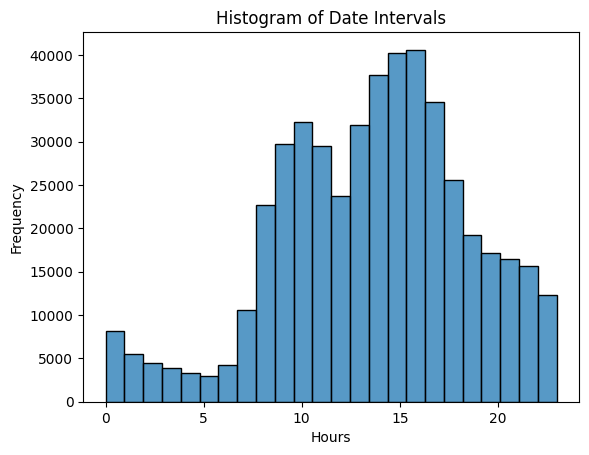

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('emotions.csv')

df['date'] = pd.to_datetime(df['date'])

df['date_interval'] = df['date'].dt.hour

sns.histplot(df['date_interval'].astype(int), bins=24, kde=False) 
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Histogram of Date Intervals')
plt.show()


[2.0, 0.8, 2.0, 0.9, 3.0, 0.0, 0.8, 0.7, 0.1, 0.1, 0.7, 0.0, 0.9, 0.0, 0.6, 2.5, 1.4, 0.4, 0.2, 0.5, 2.5, 1.3, 0.2, 0.9, 0.2, 0.9, 0.3, 0.0, 0.4, 0.5, 0.8, 1.0, 0.0, 0.6, 0.1, 0.2, 1.1, 0.3, 0.5, 0.3, 0.0, 0.5, 0.6, 2.0, 0.9, 0.7, 0.0, 0.0, 0.0, 0.7, 0.1, 0.5, 0.3, 0.2, 0.7, 0.0, 0.2, 0.2, 0.5, 0.5, 0.8, 0.6, 0.8, 0.4, 0.0, 0.0, 0.0, 2.5, 1.4, 0.5, 0.2, 0.2, 1.0, 0.6, 0.0, 0.7, 0.5, 0.8, 1.6, 0.3, 1.3, 0.6, 0.0, 0.7, 2.5, 0.3, 0.5, 0.0, 0.6, 0.7, 0.0, 0.1, 0.5, 0.0, 0.0, 1.0, 0.8, 0.6, 0.8, 1.0, 2.0, 0.0, 0.8, 0.6, 1.2, 0.5, 1.0, 0.0, 0.3, 0.6, 0.4, 0.0, 0.0, 0.0, 0.4, 0.5, 0.2, 0.1, 0.9, 0.2, 0.0, 0.3, 0.2, 0.4, 1.3, 2.0, 0.7, 0.6, 1.5, 1.0, 0.0, 0.7, 0.5, 0.0, 1.3, 0.3, 2.0, 1.2, 0.2, 0.2, 0.9, 1.0, 1.6, 0.4, 0.0, 0.0, 1.0, 1.6, 1.3, 0.8, 0.9, 1.0, 0.6, 4.0, 0.3, 1.1, 0.6, 0.2, 0.0, 0.0, 0.3, 0.6, 0.3, 0.5, 0.2, 0.5, 0.4, 0.2, 0.5, 0.6, 0.6, 1.9, 0.2, 1.0, 0.0, 1.7, 0.0, 1.0, 0.8, 0.3, 0.2, 0.8, 0.7, 0.0, 0.4, 0.3, 1.0, 0.5, 1.4, 0.0, 0.6, 2.0, 0.4, 0.6, 0.8, 0.8, 0.4, 0.8, 0.0, 0.2,

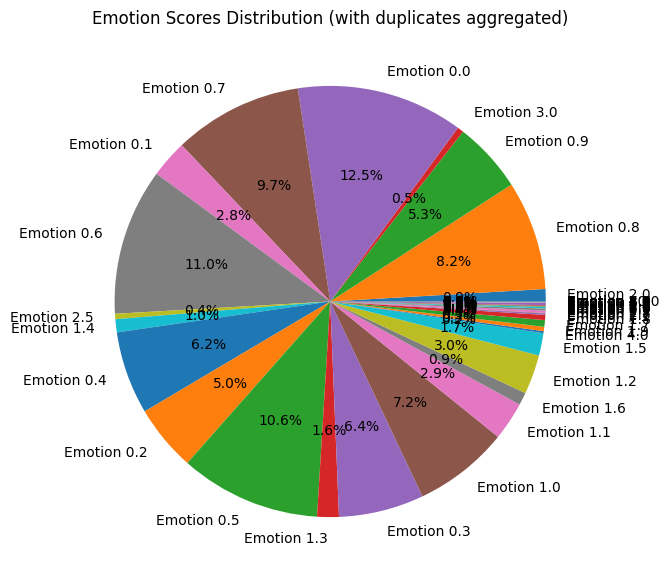

In [4]:
import matplotlib.pyplot as plt
import csv
from collections import Counter

emotion_scores = []

with open('emotions.csv', 'r') as f:
    reader = csv.reader(f)
    names = next(reader)  

    for i, row in enumerate(reader):
        scores = [float(x) for x in row[-1].strip('[]').split()] 
        emotion_scores.append(((sum(scores) * 10) // 1) / 10)  

print(emotion_scores)

emotion_counts = Counter(emotion_scores)

labels = [f'Emotion {key}' for key in emotion_counts.keys()]
sizes = list(emotion_counts.values())

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Emotion Scores Distribution (with duplicates aggregated)')
plt.show()
